In [ ]:
# ** GUIDE FOR ABS XLSX FILES **

# https://www.kaggle.com/code/maxim75/australian-census-2021

In [47]:
# TODO
"""
- (Table_1) vhicle registartion by type and state/territory
- (Table_3) specifies average age of vehicles. 
    We can use this as analysis of states that are more willing to buy newer vehicles.
- (Table_5) specifies type of fuel by state.
    Use this as another estimate of number of 
- (Table_6) is the top vehicles makes in 2021.
    Use this to chart the most popular makes in Australia.
- (Table_4) Show fuel distribution by vechile type. Show that passenger vehicles have an increased percentage share for other fuel types.
    -> Table 5 data is skewed as other vehicle types dont use other fuel types.

- Pyspark schema type define
"""

None

In [1]:
import pandas as pd

## Table_1 cleaning

In [5]:
## ** Table_1 **
motor_vehicle_registrations = pd.read_excel("../local_datasets/abs/abs_motor_vehicle_census.xls", sheet_name="Table_1", skiprows=4)

motor_vehicle_registrations

,Unnamed: 0,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,Australia
0,NaN,no.,no.,no.,no.,no.,no.,no.,no.,no.
1,PASSENGER VEHICLES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,4134786,3666505,2715055,1061776,1583939,316904,95196,240946,13815107
3,2020,4348429,3963818,2919855,1110427,1631779,345929,99311,259701,14679249
4,2021,4404673,3970844,2975229,1131199,1653342,349959,100676,264753,14850675
5,CAMPERVANS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016,15345,13118,14864,4164,8154,4588,223,444,60900
7,2020,19601,15268,18131,5050,8336,5157,189,488,72220
8,2021,20699,15155,18608,5452,8405,5283,211,511,74324
9,LIGHT COMMERCIAL VEHICLES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
## ** Define rows to remove and column value to add **

remove_indices = [0] # List of indexes to remove (first index by default to be removed)

vehicle_type = ""
vehicle_type_col = [] # Column to be added later
for row in motor_vehicle_registrations.iterrows():
    if row[0] == 0:
        continue # Skip first row

    check_val = row[1].iloc[1] # Check NaN value in this section
    if (pd.isna(check_val)):
        remove_indices.append(row[0]) # Add index to remove
        new_vehicle_type = row[1].iloc[0]
        if not (pd.isna(new_vehicle_type) or new_vehicle_type == "© Commonwealth of Australia 2021"):
            vehicle_type = new_vehicle_type # Only update vehicle type if it is not NaN or copyright statement
        continue
    else:
        vehicle_type_col.append(vehicle_type) # Add vehicle type to col

In [32]:
# Remove the indexes specified:
new_motor_df = motor_vehicle_registrations.drop(motor_vehicle_registrations.index[remove_indices], axis=0)

In [33]:
# Add vehicle type column
new_motor_df.insert(0, "Vehicle Type", vehicle_type_col, True)

In [34]:
new_motor_df
# TODO: Convert this dataframe to a csv file (abs_vehicle_registrations_by_state)

,Vehicle Type,Unnamed: 0,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,Australia
2,PASSENGER VEHICLES,2016,4134786,3666505,2715055,1061776,1583939,316904,95196,240946,13815107
3,PASSENGER VEHICLES,2020,4348429,3963818,2919855,1110427,1631779,345929,99311,259701,14679249
4,PASSENGER VEHICLES,2021,4404673,3970844,2975229,1131199,1653342,349959,100676,264753,14850675
6,CAMPERVANS,2016,15345,13118,14864,4164,8154,4588,223,444,60900
7,CAMPERVANS,2020,19601,15268,18131,5050,8336,5157,189,488,72220
8,CAMPERVANS,2021,20699,15155,18608,5452,8405,5283,211,511,74324
10,LIGHT COMMERCIAL VEHICLES,2016,804665,652020,775864,199058,380403,99346,44419,29817,2985592
11,LIGHT COMMERCIAL VEHICLES,2020,941140,753341,887239,226726,406009,114299,44762,33500,3407016
12,LIGHT COMMERCIAL VEHICLES,2021,975509,774389,917546,235666,417115,118901,45502,34829,3519457
14,LIGHT RIGID TRUCKS,2016,48788,31309,35909,7104,17293,3356,623,1044,145426


---

## Table_3 cleaning

In [35]:
## ** Table_3 **
motor_vehicle_registrations = pd.read_excel("../local_datasets/abs/abs_motor_vehicle_census.xls", sheet_name="Table_3", skiprows=4)

motor_vehicle_registrations

,Unnamed: 0,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,Australia
0,NaN,years,years,years,years,years,years,years,years,years
1,PASSENGER VEHICLES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,9.4,9.8,9.5,11.3,10.1,12.2,8.9,9.3,9.8
3,2020,9.5,9.9,9.9,11.7,11,12.5,9.5,9.5,10.1
4,2021,9.7,10.3,10.1,11.9,11.2,12.9,9.9,9.4,10.4
5,CAMPERVANS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016,15.5,17,14.3,21.2,22.6,21.9,19.4,19.1,17.4
7,2020,15.5,15.8,14.3,21,23,22.3,19.9,17.6,17
8,2021,15.6,16.4,14.7,21.3,22.9,22.8,20,18.1,17.3
9,LIGHT COMMERCIAL VEHICLES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
## ** Define rows to remove and column value to add **

remove_indices = [0] # List of indexes to remove (first index by default to be removed)

vehicle_type = ""
vehicle_type_col = [] # Column to be added later
for row in motor_vehicle_registrations.iterrows():
    if row[0] == 0:
        continue # Skip first row

    check_val = row[1].iloc[1] # Check NaN value in this section
    if (pd.isna(check_val)):
        remove_indices.append(row[0]) # Add index to remove
        new_vehicle_type = row[1].iloc[0]
        if not (pd.isna(new_vehicle_type) or new_vehicle_type == "© Commonwealth of Australia 2021"):
            vehicle_type = new_vehicle_type # Only update vehicle type if it is not NaN or copyright statement
        continue
    else:
        vehicle_type_col.append(vehicle_type) # Add vehicle type to col

In [40]:
# Remove the indexes specified:
# Using same indices array and vehicle type array from before
new_motor_df = motor_vehicle_registrations.drop(motor_vehicle_registrations.index[remove_indices], axis=0)

In [41]:
# Add vehicle type column
new_motor_df.insert(0, "Vehicle Type", vehicle_type_col, True)

In [42]:
new_motor_df
# TODO: Convert this dataframe to a csv file (abs_average_age_of_vehicle_by_state.csv)

,Vehicle Type,Unnamed: 0,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,Australia
2,PASSENGER VEHICLES,2016,9.4,9.8,9.5,11.3,10.1,12.2,8.9,9.3,9.8
3,PASSENGER VEHICLES,2020,9.5,9.9,9.9,11.7,11,12.5,9.5,9.5,10.1
4,PASSENGER VEHICLES,2021,9.7,10.3,10.1,11.9,11.2,12.9,9.9,9.4,10.4
6,CAMPERVANS,2016,15.5,17,14.3,21.2,22.6,21.9,19.4,19.1,17.4
7,CAMPERVANS,2020,15.5,15.8,14.3,21,23,22.3,19.9,17.6,17
8,CAMPERVANS,2021,15.6,16.4,14.7,21.3,22.9,22.8,20,18.1,17.3
10,LIGHT COMMERCIAL VEHICLES,2016,10.1,10.8,10.1,11.2,10.7,13.3,9.1,9.4,10.5
11,LIGHT COMMERCIAL VEHICLES,2020,9.9,10.6,10.5,11.3,11.6,13.5,9.7,9.4,10.6
12,LIGHT COMMERCIAL VEHICLES,2021,10.1,10.9,10.7,11.5,11.6,13.7,10,9.4,10.8
14,LIGHT RIGID TRUCKS,2016,10.7,11.6,11.2,12.1,11.1,14.6,12.6,10.2,11.2


---

## Table_5 cleaning

In [45]:
## ** Table_5 **
motor_vehicle_registrations = pd.read_excel("../local_datasets/abs/abs_motor_vehicle_census.xls", sheet_name="Table_5", skiprows=5)

motor_vehicle_registrations

,Unnamed: 0,Leaded,Unleaded,Total,Diesel,Other,All fuel types
0,NaN,no.,no.,no.,no.,no.,no.
1,NEW SOUTH WALES,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,86694,4148495,4235189,1030701,108529,5374419
3,2020,58672,4217532,4276204,1393740,109095,5779039
4,2021,56327,4240947,4297274,1467320,127612,5892206
5,VICTORIA,NaN,NaN,NaN,NaN,NaN,NaN
6,2016,93128,3538398,3631526,856587,193224,4681337
7,2020,68372,3730295,3798667,1178911,141982,5119560
8,2021,65921,3727391,3793312,1228562,135298,5157172
9,QUEENSLAND,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
## ** Define rows to remove and column value to add **

remove_indices = [0] # List of indexes to remove (first index by default to be removed)

state = ""
state_col = [] # Column to be added later
for row in motor_vehicle_registrations.iterrows():
    if row[0] == 0:
        continue # Skip first row

    check_val = row[1].iloc[1] # Check NaN value in this section
    if (pd.isna(check_val)):
        remove_indices.append(row[0]) # Add index to remove
        new_state = row[1].iloc[0]
        if not (pd.isna(new_state) or new_state == "© Commonwealth of Australia 2021"):
            state = new_state # Only update vehicle type if it is not NaN or copyright statement
        continue
    else:
        state_col.append(state) # Add vehicle type to col

In [50]:
# Remove the indexes specified:
# Using same indices array and vehicle type array from before
new_motor_df = motor_vehicle_registrations.drop(motor_vehicle_registrations.index[remove_indices], axis=0)

In [51]:
# Add state name column
new_motor_df.insert(0, "State", state_col, True)

In [52]:
new_motor_df
# TODO: Convert this dataframe to a csv file (abs_fuel_type_by_state.csv)
# TODO: rename column for leaded petorl, unleaded petrol and total petrol or just keep total petrol column

,State,Unnamed: 0,Leaded,Unleaded,Total,Diesel,Other,All fuel types
2,NEW SOUTH WALES,2016,86694,4148495,4235189,1030701,108529,5374419
3,NEW SOUTH WALES,2020,58672,4217532,4276204,1393740,109095,5779039
4,NEW SOUTH WALES,2021,56327,4240947,4297274,1467320,127612,5892206
6,VICTORIA,2016,93128,3538398,3631526,856587,193224,4681337
7,VICTORIA,2020,68372,3730295,3798667,1178911,141982,5119560
8,VICTORIA,2021,65921,3727391,3793312,1228562,135298,5157172
10,QUEENSLAND,2016,80870,2746219,2827089,971446,55670,3854205
11,QUEENSLAND,2020,72525,2827272,2899797,1250032,55271,4205100
12,QUEENSLAND,2021,72897,2850502,2923399,1314018,66296,4303713
14,SOUTH AUSTRALIA,2016,40608,1071554,1112162,241974,10564,1364700


---

## Table_6 Cleaning

In [53]:
## ** Table_6 **
motor_vehicle_registrations = pd.read_excel("../local_datasets/abs/abs_motor_vehicle_census.xls", sheet_name="Table_6", skiprows=4)

motor_vehicle_registrations

,Unnamed: 0,2016,2020,2021,Change 16/21,Change 20/21
0,NaN,no.,no.,no.,%,%
1,Toyota,2786246,2978505,3038983,9.1,2
2,Holden,1904306,1575483,1491233,-21.7,-5.3
3,Mazda,1061824,1310979,1360109,28.1,3.7
4,Hyundai,949121,1026137,1180576,24.4,15.1
5,Ford,1349498,1077741,1025919,-24,-4.8
6,Mitsubishi,835968,848664,850639,1.8,0.2
7,Nissan,807222,824200,823823,2.1,0
8,Honda,675149,752018,745898,10.5,-0.8
9,Subaru,599998,702367,716086,19.3,2


In [54]:
remove_indices = [0,32,33,34] # Manual inspection removal 

In [55]:
new_motor_df = motor_vehicle_registrations.drop(motor_vehicle_registrations.index[remove_indices], axis=0)

In [56]:
new_motor_df

,Unnamed: 0,2016,2020,2021,Change 16/21,Change 20/21
1,Toyota,2786246,2978505,3038983,9.1,2
2,Holden,1904306,1575483,1491233,-21.7,-5.3
3,Mazda,1061824,1310979,1360109,28.1,3.7
4,Hyundai,949121,1026137,1180576,24.4,15.1
5,Ford,1349498,1077741,1025919,-24,-4.8
6,Mitsubishi,835968,848664,850639,1.8,0.2
7,Nissan,807222,824200,823823,2.1,0
8,Honda,675149,752018,745898,10.5,-0.8
9,Subaru,599998,702367,716086,19.3,2
10,Volkswagen,411723,516328,549003,33.3,6.3


---

## Table_4 Cleaning

In [2]:
## ** Table_5 **
motor_vehicle_registrations = pd.read_excel("../local_datasets/abs/abs_motor_vehicle_census.xls", sheet_name="Table_4", skiprows=5)

motor_vehicle_registrations

,Unnamed: 0,Leaded,Unleaded,Total,Diesel,Other,All fuel types
0,NaN,no.,no.,no.,no.,no.,no.
1,PASSENGER VEHICLES,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,250854,11801876,12052730,1464429,297948,13815107
3,2020,203724,12266226,12469950,1948298,261001,14679249
4,2021,199813,12324783,12524596,2036876,289203,14850675
5,CAMPERVANS,NaN,NaN,NaN,NaN,NaN,NaN
6,2016,5516,14082,19598,39362,1940,60900
7,2020,4134,16767,20901,49862,1457,72220
8,2021,3967,16692,20659,52305,1360,74324
9,LIGHT COMMERCIAL VEHICLES,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
## ** Define rows to remove and column value to add **

remove_indices = [0] # List of indexes to remove (first index by default to be removed)

vehicle_type = ""
vehicle_type_col = [] # Column to be added later
for row in motor_vehicle_registrations.iterrows():
    if row[0] == 0:
        continue # Skip first row

    check_val = row[1].iloc[1] # Check NaN value in this section
    if (pd.isna(check_val)):
        remove_indices.append(row[0]) # Add index to remove
        new_vehicle_type = row[1].iloc[0]
        if not (pd.isna(new_vehicle_type) or new_vehicle_type == "© Commonwealth of Australia 2021"):
            vehicle_type = new_vehicle_type # Only update vehicle type if it is not NaN or copyright statement
        continue
    else:
        vehicle_type_col.append(vehicle_type) # Add vehicle type to col

In [4]:
# Remove the indexes specified:
# Using same indices array and vehicle type array from before
new_motor_df = motor_vehicle_registrations.drop(motor_vehicle_registrations.index[remove_indices], axis=0)

In [5]:
# Add vehicle type column
new_motor_df.insert(0, "Vehicle Type", vehicle_type_col, True)

In [6]:
new_motor_df.head()
# TODO: Convert this dataframe to a csv file (abs_average_age_of_vehicle_by_state.csv)

,Vehicle Type,Unnamed: 0,Leaded,Unleaded,Total,Diesel,Other,All fuel types
2,PASSENGER VEHICLES,2016,250854,11801876,12052730,1464429,297948,13815107
3,PASSENGER VEHICLES,2020,203724,12266226,12469950,1948298,261001,14679249
4,PASSENGER VEHICLES,2021,199813,12324783,12524596,2036876,289203,14850675
6,CAMPERVANS,2016,5516,14082,19598,39362,1940,60900
7,CAMPERVANS,2020,4134,16767,20901,49862,1457,72220


---

## Plotting Table 4 (fuel type data)

- 

In [7]:
# TODO:
# Rename the columns to be more specific
# Rename Total column to Petrol (remove leaded and unleaded columns)
# Rename the year column

new_motor_df.columns.values.tolist()

['Vehicle Type',
 'Unnamed: 0',
 'Leaded',
 'Unleaded',
 'Total',
 'Diesel',
 'Other',
 'All fuel types']

In [8]:
# ** Drop column **
new_motor_df = new_motor_df.drop('Leaded', axis=1)
new_motor_df = new_motor_df.drop('Unleaded', axis=1)

# ** Rename columns **
new_motor_df = new_motor_df.rename(columns={'Unnamed: 0':'Year', 'Total':'Petrol'})

In [9]:
new_motor_df.head()

,Vehicle Type,Year,Petrol,Diesel,Other,All fuel types
2,PASSENGER VEHICLES,2016,12052730,1464429,297948,13815107
3,PASSENGER VEHICLES,2020,12469950,1948298,261001,14679249
4,PASSENGER VEHICLES,2021,12524596,2036876,289203,14850675
6,CAMPERVANS,2016,19598,39362,1940,60900
7,CAMPERVANS,2020,20901,49862,1457,72220


In [10]:
# ** Plot barchart for particular year **
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [11]:
petrol_data = new_motor_df.query(f"Year == {2016}")["Petrol"].to_numpy()
petrol_data


array([12052730, 19598, 1171635, 7656, 13226, 1069, 2814, 17522, 828807,
       14115057], dtype=object)

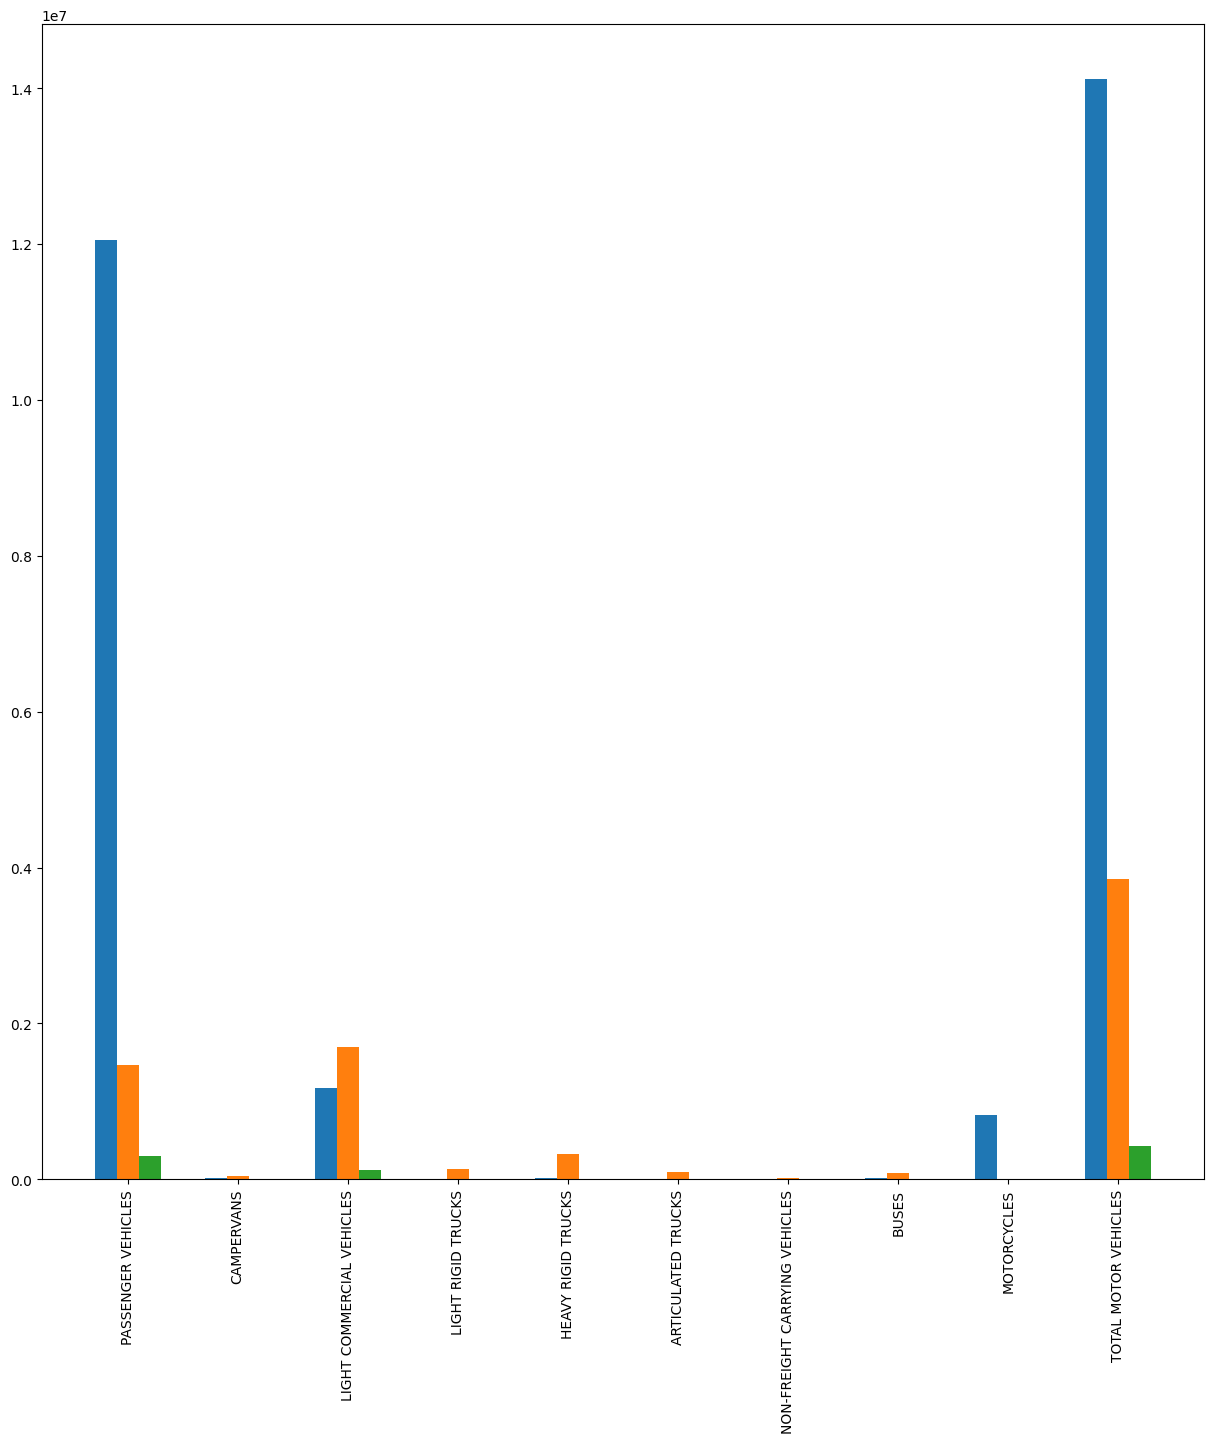

In [63]:
vehicle_types = new_motor_df["Vehicle Type"].unique()
fuel_types = ["Petrol", "Diesel", "Other"]

year_to_plot = 2016

no_vehicle_types = len(vehicle_types)
bar_width = 0.2

fig, ax = plt.subplots(figsize=(15,15))
index = np.arange(no_vehicle_types)

for i, fuel_type in enumerate(fuel_types):
    fuel_data = new_motor_df.query(f"Year == {year_to_plot}")[fuel_type].to_numpy()
    ax.bar(index + (bar_width*i), fuel_data, bar_width, label=str(fuel_type))


ax.set_xticks(index + bar_width)
ax.set_xticklabels(vehicle_types)
plt.xticks(rotation=90)


plt.show()

In [16]:
passenger_vehicles

,Vehicle Type,Year,Petrol,Diesel,Other,All fuel types
2,PASSENGER VEHICLES,2016,12052730,1464429,297948,13815107
3,PASSENGER VEHICLES,2020,12469950,1948298,261001,14679249
4,PASSENGER VEHICLES,2021,12524596,2036876,289203,14850675


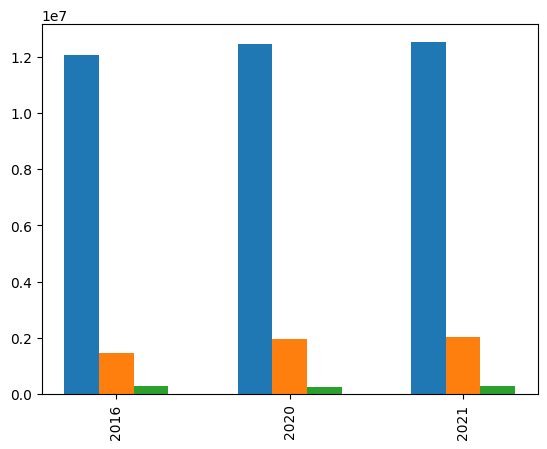

In [17]:
# ** Plot instead for passenger vehicles and with years **

years = new_motor_df["Year"].unique()
fuel_types = ["Petrol", "Diesel", "Other"]
passenger_vehicles = new_motor_df[new_motor_df["Vehicle Type"] == "PASSENGER VEHICLES"]


no_years = len(years)
bar_width = 0.2

fig, ax = plt.subplots()
index = np.arange(no_years)



for i, fuel_type in enumerate(fuel_types):
    fuel_data = passenger_vehicles[fuel_type].to_numpy()
    ax.bar(index + (bar_width*i), fuel_data, bar_width, label=str(fuel_type))


ax.set_xticks(index + bar_width)
ax.set_xticklabels(years)
plt.xticks(rotation=90)


plt.show()

On a whole this does not look promising. The fuel type break down has remained largely the same from 2016 to 2021.

However, an interesting analysis from the census comes from motorcycles.

They show a tremendous increases in adoption of other fuel types.